In [62]:
import pandas as pd
import numpy as np
import seaborn as sns

In [63]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test/test.csv")

In [64]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [65]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [66]:
test.shape
train.shape

(2500, 8)

In [67]:
# percentage null values
(test.isnull().sum()/len(test))*100

key                  0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

In [68]:
x = False
vals = (test.isnull().sum()/len(test))*100 > 0.0
for i in vals:
    if i == True:
        x = True

print('x = ', x)        

x =  False


In [69]:
(test.isnull().sum()/len(test))*100

key                  0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

In [70]:
x = False
vals = (train.isnull().sum()/len(train))*100 > 0.0
for i in vals:
    if i == True:
        x = True

print('x = ', x)  

x =  False


In [71]:
test = test.dropna()
train = train.dropna()
test = test.drop('pickup_datetime', axis = 1)
train = train.drop('pickup_datetime', axis = 1)
test = test.drop('key', axis = 1)
train = train.drop('key', axis = 1)


In [72]:
test.nunique()

pickup_longitude     9125
pickup_latitude      9247
dropoff_longitude    9142
dropoff_latitude     9360
passenger_count         6
dtype: int64

In [73]:
train.nunique()

fare_amount           211
pickup_longitude     2401
pickup_latitude      2423
dropoff_longitude    2408
dropoff_latitude     2413
passenger_count         7
dtype: int64

In [74]:
train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [75]:
test.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [76]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [77]:
y = train['fare_amount']
train = train.drop('fare_amount', axis = 1)

In [78]:
y

0        4.5
1       16.9
2        5.7
3        7.7
4        5.3
        ... 
2495    24.5
2496     7.3
2497    10.1
2498    20.5
2499     6.5
Name: fare_amount, Length: 2500, dtype: float64

C:\Users\shehr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pickup_longitude', ylabel='Density'>

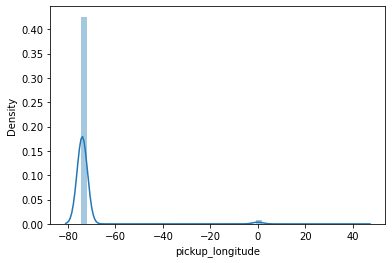

In [79]:
sns.distplot(train['pickup_longitude'])

C:\Users\shehr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pickup_latitude', ylabel='Density'>

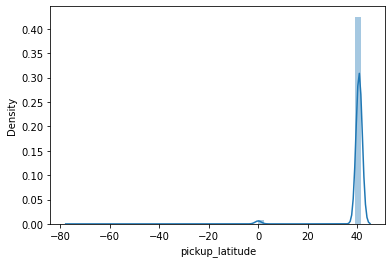

In [80]:
sns.distplot(train['pickup_latitude'])

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
mn = MinMaxScaler()
train_mn = mn.fit_transform(train)

In [83]:
train_mn

array([[0.00515603, 0.99441004, 0.00510228, 0.99721487, 0.16666667],
       [0.00366512, 0.99432321, 0.00390721, 0.99782113, 0.16666667],
       [0.0039543 , 0.99475638, 0.00380325, 0.99754775, 0.33333333],
       ...,
       [0.00399508, 0.99499637, 0.0041546 , 0.9977138 , 0.16666667],
       [0.00464421, 0.99462296, 0.00411721, 0.99779782, 0.16666667],
       [0.00395389, 0.99450376, 0.00374771, 0.99737231, 0.16666667]])

In [84]:
train_mn = pd.DataFrame(train_mn, columns=train.columns, index=train.index)

In [85]:
train_mn

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0.005156,0.994410,0.005102,0.997215,0.166667
1,0.003665,0.994323,0.003907,0.997821,0.166667
2,0.003954,0.994756,0.003803,0.997548,0.333333
3,0.003916,0.994513,0.003800,0.997613,0.166667
4,0.004081,0.994815,0.004104,0.997836,0.166667
...,...,...,...,...,...
2495,0.003823,0.994345,0.003826,0.997754,0.833333
2496,0.003902,0.994618,0.003956,0.997440,0.166667
2497,0.003995,0.994996,0.004155,0.997714,0.166667
2498,0.004644,0.994623,0.004117,0.997798,0.166667


In [86]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982524,40.751260,-73.979654,40.746139,1
3,-73.981160,40.767807,-73.990448,40.751635,1
4,-73.966046,40.789775,-73.988565,40.744427,1


In [87]:
test_mn = mn.fit_transform(test)

In [88]:
test_mn = pd.DataFrame(test_mn, columns = test.columns, index = test.index)

In [89]:
test_mn.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0.220338,0.167776,0.221502,0.155060,0.0
1,0.209638,0.128686,0.207781,0.150950,0.0
2,0.213066,0.156736,0.222898,0.157102,0.0
3,0.214143,0.171297,0.214414,0.161976,0.0
4,0.226085,0.190628,0.215894,0.155584,0.0


In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lr = LinearRegression()

In [92]:
lr.fit(train, y)

LinearRegression()

In [93]:
pred = lr.predict(test)

In [94]:
lr.coef_

array([ 0.07465541, -0.10301003, -0.03574844,  0.20118995,  0.01720469])